In [53]:
import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

In [54]:
import matplotlib.pyplot as plt
from numpy import linalg as LA
import scipy.special

import time
from scipy.integrate import odeint
from scipy.special import zeta
from random import choices

from numpy import sin, cos, power


In [55]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np

from scipy.optimize import minimize
#from qutip import *
#from qutip.piqs import *

import matplotlib.animation as animation
from IPython.display import HTML
from IPython.core.display import Image, display

In [56]:
"""Our system of differential equations belongs to the complex space, that is why we implemented the code suggested in"""
"""https://stackoverflow.com/questions/19910189/scipy-odeint-with-complex-initial-values."""

import time
import numpy as np
from scipy.integrate import odeint
from scipy.special import zeta
from random import choices

def odeintz(func, z0, t, **kwargs):
   
    
    """An odeint-like function for complex valued differential equations.

    Inputs:
    ----------
      -func: function associated to dr/dt=f(x;t), where x is the set of parameters and variables to be determined
      -z0: 1d array with length N*(5N-1)/2
      -t: 1d array from t=0 to t=tf (parameter set by the user)
      - **kwargs: keyword arguments related with external functions to be used in odeint
    
    Return:
      -z: multivariable array with the solution of the differential equation associated with each variable"""

    # Disallow Jacobian-related arguments.
    _unsupported_odeint_args = ['Dfun', 'col_deriv', 'ml', 'mu']
    bad_args = [arg for arg in kwargs if arg in _unsupported_odeint_args]
    if len(bad_args) > 0:
        raise ValueError("The odeint argument %r is not supported by "
                         "odeintz." % (bad_args[0],))

    # Make sure z0 is a numpy array of type np.complex128.
    z0 = np.array(z0, dtype=np.complex128, ndmin=1)

    def realfunc(x, t, *args):
        z = x.view(np.complex128)
        dzdt = func(z, t, *args)
        # func might return a python list, so convert its return
        # value to an array with type np.complex128, and then return
        # a np.float64 view of that array.
        return np.asarray(dzdt, dtype=np.complex128).view(np.float64)

    result = odeint(realfunc, z0.view(np.float64), t, **kwargs)

    if kwargs.get('full_output', False):
        z = result[0].view(np.complex128)
        infodict = result[1]
        return z, infodict
    else:
        z = result.view(np.complex128)
        return z

$$\begin{align}
\partial_{t}s_{00,i} & =-g_{{\rm R}}\left(\alpha_{{\rm R},x}s_{30,i}^{y}+\alpha_{{\rm R},y}s_{30,i}^{x}\right)-\frac{\Omega_{{\rm R}}}{2}s_{30,i}^{y},\\
\partial_{t}s_{11,i} & =-g_{{\rm L}}\left(\alpha_{{\rm L},x}s_{21,i}^{y}+\alpha_{{\rm L},y}s_{21,i}^{x}\right)-\frac{\Omega_{{\rm L}}}{2}s_{21,i}^{y},\\
\partial_{t}s_{22,i} & =g_{{\rm L}}\left(\alpha_{{\rm L},x}s_{21,i}^{y}+\alpha_{{\rm L},y}s_{21,i}^{x}\right)+\frac{\Omega_{{\rm L}}}{2}s_{21,i}^{y},\\
\partial_{t}s_{33,i} & =g_{{\rm R}}\left(\alpha_{{\rm R},x}s_{30,i}^{y}+\alpha_{{\rm R},y}s_{30,i}^{x}\right)+\frac{\Omega_{{\rm R}}}{2}s_{30,i}^{y},\\
\partial_{t}s_{10,i}^{x} & =-g_{{\rm R}}\left(\alpha_{{\rm R},x}s_{31,i}^{y}+\alpha_{{\rm R},y}s_{31,i}^{x}\right)-\frac{\Omega_{{\rm R}}}{2}s_{31,i}^{y}-g_{{\rm L}}\left(\alpha_{{\rm L},x}s_{20,i}^{y}+\alpha_{{\rm L},y}s_{20,i}^{x}\right)-\frac{\Omega_{{\rm L}}}{2}s_{20,i}^{y},\\
\partial_{t}s_{20,i}^{x} & =-g_{{\rm R}}\left(\alpha_{{\rm R},x}s_{32,i}^{y}+\alpha_{{\rm R},y}s_{32,i}^{x}\right)-\frac{\Omega_{{\rm R}}}{2}s_{32,i}^{y}-g_{{\rm L}}\left(\alpha_{{\rm L},x}s_{10,i}^{y}-\alpha_{{\rm L},y}s_{10,i}^{x}\right)-\frac{\Omega_{{\rm L}}}{2}s_{10,i}^{y},\\
\partial_{t}s_{30,i}^{x} & =-2g_{{\rm R}}\alpha_{{\rm R},y}\left(s_{33,i}-s_{00,i}\right),\\
\partial_{t}s_{21,i}^{x} & =-2g_{{\rm L}}\alpha_{{\rm L},y}\left(s_{22,i}-s_{11,i}\right),\\
\partial_{t}s_{31,i}^{x} & =g_{{\rm R}}\left(\alpha_{{\rm R},x}s_{10,i}^{y}+\alpha_{{\rm R},y}s_{10,i}^{x}\right)+\frac{\Omega_{{\rm R}}}{2}s_{10.i}^{y}+g_{{\rm L}}\left(\alpha_{{\rm L},x}s_{32,i}^{y}-\alpha_{{\rm L},y}s_{32,i}^{x}\right)+\frac{\Omega_{{\rm L}}}{2}s_{32,i}^{y},\\
\partial_{t}s_{32,i}^{x} & =g_{{\rm R}}\left(\alpha_{{\rm R},x}s_{20,i}^{y}+\alpha_{{\rm R},y}s_{20,i}^{x}\right)+\frac{\Omega_{{\rm R}}}{2}s_{20,i}^{y}+g_{{\rm L}}\left(\alpha_{{\rm L},x}s_{31,i}^{y}+\alpha_{{\rm L},y}s_{31,i}^{x}\right)+\frac{\Omega_{{\rm L}}}{2}s_{31,i}^{y},\\
\partial_{t}s_{10,i}^{y} & =-g_{{\rm R}}\left(\alpha_{{\rm R},x}s_{31,i}^{x}-\alpha_{{\rm R},y}s_{31,i}^{y}\right)-\frac{\Omega_{{\rm R}}}{2}s_{31,i}^{x}+g_{{\rm L}}\left(\alpha_{{\rm L},x}s_{20,i}^{x}-\alpha_{{\rm L},y}s_{20,i}^{y}\right)+\frac{\Omega_{{\rm L}}}{2}s_{20,i}^{x},\\
\partial_{t}s_{20,i}^{y} & =-g_{{\rm R}}\left(\alpha_{{\rm R},x}s_{32,i}^{x}-\alpha_{{\rm R},y}s_{32,i}^{y}\right)-\frac{\Omega_{{\rm R}}}{2}s_{32,i}^{x}+g_{{\rm L}}\left(\alpha_{{\rm L},x}s_{10,i}^{x}+\alpha_{{\rm L},y}s_{10,i}^{y}\right)+\frac{\Omega_{{\rm L}}}{2}s_{10,i}^{x},\\
\partial_{t}s_{30,i}^{y} & =-\left(2g_{{\rm R}}\alpha_{{\rm R},x}+\Omega_{{\rm R}}\right)\left(s_{33,i}-s_{00,i}\right),\\
\partial_{t}s_{21,i}^{y} & =-\left(2g_{{\rm L}}\alpha_{{\rm L},x}+\Omega_{{\rm L}}\right)\left(s_{22,i}-s_{11,i}\right),\\
\partial_{t}s_{31,i}^{y} & =g_{{\rm R}}\left(\alpha_{{\rm R},x}s_{10,i}^{x}-\alpha_{{\rm R},y}s_{10,i}^{y}\right)+\frac{\Omega_{{\rm R}}}{2}s_{10,i}^{x}-g_{{\rm L}}\left(\alpha_{{\rm L},x}s_{32,i}^{x}+\alpha_{{\rm L},y}s_{32,i}^{y}\right)-\frac{\Omega_{{\rm L}}}{2}s_{32,i}^{x},\\
\partial_{t}s_{32,i}^{y} & =g_{{\rm R}}\left(\alpha_{{\rm R},x}s_{20,i}^{x}-\alpha_{{\rm R},y}s_{20,i}^{y}\right)+\frac{\Omega_{{\rm R}}}{2}s_{20,i}^{x}-g_{{\rm L}}\left(\alpha_{{\rm L},x}s_{31,i}^{x}-\alpha_{{\rm L},y}s_{31,i}^{y}\right)-\frac{\Omega_{{\rm L}}}{2}s_{31,i}^{x},\\
\partial_{t}\alpha_{{\rm L},x} & =-\frac{g_{{\rm L}}}{2}\sum_{i}s_{21,i}^{y}-\Delta_{{\rm L}}\alpha_{{\rm L},y}-\frac{\kappa_{{\rm L}}}{2}\alpha_{{\rm L},x}+\sqrt{\frac{\kappa_{{\rm L}}}{4}}{\rm d}W_{0},\\
\partial_{t}\alpha_{{\rm L},y} & =-\frac{g_{{\rm L}}}{2}\sum_{i}s_{21,i}^{x}+\Delta_{{\rm L}}\alpha_{{\rm L},x}-\frac{\kappa_{{\rm L}}}{2}\alpha_{{\rm L},y}+\sqrt{\frac{\kappa_{{\rm L}}}{4}}{\rm d}W_{1},\\
\partial_{t}\alpha_{{\rm R},x} & =-\frac{g_{{\rm R}}}{2}\sum_{i}s_{30,i}^{y}-\Delta_{{\rm R}}\alpha_{{\rm R},y}-\frac{\kappa_{{\rm R}}}{2}\alpha_{{\rm R},x}+\sqrt{\frac{\kappa_{{\rm R}}}{4}}{\rm d}W_{2},\\
\partial_{t}\alpha_{{\rm R},y} & =-\frac{g_{{\rm R}}}{2}\sum_{i}s_{30,i}^{x}+\Delta_{{\rm R}}\alpha_{{\rm R},x}-\frac{\kappa_{{\rm R}}}{2}\alpha_{{\rm R},y}+\sqrt{\frac{\kappa_{R}}{4}}{\rm d}W_{3}.
\end{align}
$$

## Euler-Maruyama

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import random, zeros, sqrt,cos,sin



from numba import jit

dt = 0.0001 # Time step.
T = 20 # Total time.
n = int(T / dt) # Number of time steps.
steps=int(T/dt)

times = np.linspace(0., T, n)


N=30

gR=1
DeltaR=0
KapR=20
OmegaR=0.9*2*N/KapR 


gL=1
DeltaL=0
KapL=20
OmegaL=0.9*2*N/KapL 


    

Gamma_du=0  #Fixed


#Stochastic=1   #Is the process stochastic?
sqrt_N=np.sqrt(N)



#set the initial values due to the measurements in the state |\psi>=cos(\theta/2)|0>+sin(\theta/2)|1>


theta = np.pi/2
phi   = np.pi/2





from scipy import stats

mk = np.array([-1/sqrt(2),0,1/sqrt(2)])

mzk=np.array([0,1])






x10=( 0.5* (1-cos(phi)*sin(theta)), 0 , 0.5* (1+cos(phi)*sin(theta)))
x20=( 0.5* (cos(theta/2))**2, (sin(theta/2))**2, 0.5* (cos(theta/2))**2)
x30=( 0.5* (cos(theta/2))**2, (sin(theta/2))**2, 0.5* (cos(theta/2))**2)
x21=( 0.5* (sin(theta/2))**2, (cos(theta/2))**2, 0.5* (sin(theta/2))**2)
x31=( 0.5* (sin(theta/2))**2, (cos(theta/2))**2, 0.5* (sin(theta/2))**2)
x32=(0,1,0)

y10=( 0.5* (1-sin(phi)*sin(theta)), 0 , 0.5* (1+sin(phi)*sin(theta)))
y20=( 0.5* (cos(theta/2))**2, (sin(theta/2))**2, 0.5* (cos(theta/2))**2)
y30=( 0.5* (cos(theta/2))**2, (sin(theta/2))**2, 0.5* (cos(theta/2))**2)
y21=( 0.5* (sin(theta/2))**2, (cos(theta/2))**2, 0.5* (sin(theta/2))**2)
y31=( 0.5* (sin(theta/2))**2, (cos(theta/2))**2, 0.5* (sin(theta/2))**2)
y32=(0,1,0)

z0=((sin(theta/2))**2,(cos(theta/2))**2)
z1=((cos(theta/2))**2,(sin(theta/2))**2)
z2=(1,0)


#custmx10 = stats.rv_discrete(name='custmx10', values=(mk, x10))
#custmx20 = stats.rv_discrete(name='custmx20', values=(mk, x20))
#custmx30 = stats.rv_discrete(name='custmx30', values=(mk, x30))
#custmx21 = stats.rv_discrete(name='custmx21', values=(mk, x21))
#custmx31 = stats.rv_discrete(name='custmx31', values=(mk, x31))
#custmx32 = stats.rv_discrete(name='custmx32', values=(mk, x32))

#custmy10 = stats.rv_discrete(name='custmy10', values=(mk, y10))
#custmy20 = stats.rv_discrete(name='custmy20', values=(mk, y20))
#custmy30 = stats.rv_discrete(name='custmy30', values=(mk, y30))
#custmy21 = stats.rv_discrete(name='custmy21', values=(mk, y21))
#custmy31 = stats.rv_discrete(name='custmy31', values=(mk, y31))
#custmy32 = stats.rv_discrete(name='custmy32', values=(mk, y32))

#custmz1  = stats.rv_discrete(name='custmz1' , values=(mzk, z1))
#custmz2  = stats.rv_discrete(name='custmz2' , values=(mzk, z2))
#custmz3  = stats.rv_discrete(name='custmz3' , values=(mzk, z3))


@jit

def trayectory(N,Stochastic):
    sqrtdt = np.sqrt(dt)*Stochastic
    
    Results =zeros((15*N+4, n))
    
    Results[15*N][0]   = np.random.normal(0, 0.5)
    Results[15*N+1][0] = np.random.normal(0, 0.5)
    Results[15*N+2][0] = np.random.normal(0, 0.5)
    Results[15*N+3][0] = np.random.normal(0, 0.5)
    
    
    for j in range(N):        
        
        Results[j][0]     =np.random.choice(mk,1,p=x10)[0]  #x10  
        Results[j+N][0]   =np.random.choice(mk,1,p=x20)[0]  #x20
        Results[j+2*N][0] =np.random.choice(mk,1,p=x30)[0]  #x30
        Results[j+3*N][0] =np.random.choice(mk,1,p=x21)[0]  #x21
        Results[j+4*N][0] =np.random.choice(mk,1,p=x31)[0]  #x31
        Results[j+5*N][0] =np.random.choice(mk,1,p=x32)[0]  #x32
        
        Results[j+6*N][0] =np.random.choice(mk,1,p=y10)[0]  #y10
        Results[j+7*N][0] =np.random.choice(mk,1,p=y20)[0]  #y20
        Results[j+8*N][0] =np.random.choice(mk,1,p=y30)[0]  #y30
        Results[j+9*N][0] =np.random.choice(mk,1,p=y21)[0]  #y21
        Results[j+10*N][0]=np.random.choice(mk,1,p=y31)[0]  #y31
        Results[j+11*N][0]=np.random.choice(mk,1,p=y32)[0]  #y32
        
        Results[j+12*N][0]=np.random.choice(mzk,1,p=z0)[0]  #z10
        Results[j+13*N][0]=np.random.choice(mzk,1,p=z1)[0]  #z21
        Results[j+14*N][0]=np.random.choice(mzk,1,p=z2)[0]  #z32
    
    for t in range(n-1):
        
        Normal_VA_1=random.randn() #np.random.normal(0, 1)
        Normal_VA_2=random.randn() #np.random.normal(0, 1)
        Normal_VA_3=random.randn() #np.random.normal(0, 1)
        Normal_VA_4=random.randn() #np.random.normal(0, 1)
        
        
        alpRx=Results[15*N][t]
        alpRy=Results[15*N+1][t]
        alpLx=Results[15*N+2][t]
        alpLy=Results[15*N+3][t]
        
        
        
        Results[15*N][t+1]   = alpRx-dt*DeltaR*alpRy-dt*(KapR/2)*alpRx+np.sqrt(KapR/4)*sqrtdt * Normal_VA_1
            
        Results[15*N+1][t+1] = alpRy+dt*DeltaR*alpRx-dt*(KapR/2)*alpRy+np.sqrt(KapR/4)*sqrtdt * Normal_VA_2
             
        Results[15*N+2][t+1] = alpLx -dt*DeltaL*alpLy-dt*(KapL/2)*alpLx+np.sqrt(KapL/4)*sqrtdt * Normal_VA_3  
        
        Results[15*N+3][t+1] = alpLy +dt*DeltaL*alpLx-dt*(KapL/2)*alpLy+np.sqrt(KapL/4)*sqrtdt * Normal_VA_4  
                
                
        for i in range(N): 
            
                     
            s10x=Results[i][t]       #x10
            s20x=Results[i+N][t]     #x20
            s30x=Results[i+2*N][t]   #x30  
            s21x=Results[i+3*N][t]   #x21 
            s31x=Results[i+4*N][t]   #x31
            s32x=Results[i+5*N][t]   #x32
            
            s10y=Results[i+6*N][t]   #y10
            s20y=Results[i+7*N][t]   #y20
            s30y=Results[i+8*N][t]   #y30
            s21y=Results[i+9*N][t]   #y21
            s31y=Results[i+10*N][t]  #y31
            s32y=Results[i+11*N][t]  #y32
            
            s0z=Results[i+12*N][t]  #z0
            s1z=Results[i+13*N][t]  #z1
            s2z=Results[i+14*N][t]  #z2
            
            # alpRx=Results[15*N][t]
            # alpRy=Results[15*N+1][t]
            # alpLx=Results[15*N+2][t]
            # alpLy=Results[15*N+3][t]
            
            
            Results[i][t+1]     = s10x  +dt*(-gR)*(alpRx*s31y+alpRy*s31x) +dt*(-OmegaR/2)*s31y-\
                dt*gL*(alpLx*s20y+alpLy*s20x)+dt*(-OmegaL/2)*s20y
            
            Results[i+N][t+1]   = s20x  +dt*(-gR)*(alpRx*s32y+alpRy*s32x) +dt*(-OmegaR/2)*s32y-\
                dt*gL*(alpLx*s10y-alpLy*s10x)+dt*(-OmegaL/2)*s10y
            
            Results[i+2*N][t+1] = s30x  +dt*(-sqrt(2)*gR)*alpRy*(1-s2z-s1z-2*s0z)
            
            Results[i+3*N][t+1] = s21x  +dt*(-sqrt(2)*gL)*alpLy*(s2z-s1z)
            
            Results[i+4*N][t+1] = s31x  +dt*gR*(alpRx*s10y+alpRy*s10x)+dt*(OmegaR/2)*s10y+\
                dt*gL*(alpLx*s32y-alpLy*s32x)+dt*(OmegaL/2)*s32y
            
            Results[i+5*N][t+1] = s32x  +dt*gR*(alpRx*s20y+alpRy*s20x)+dt*(OmegaR/2)*s20y+\
                dt*gL*(alpLx*s31y+alpLy*s31x)+dt*(OmegaL/2)*s31y
            
            Results[i+6*N][t+1] = s10y  +dt*(-gR)*(alpRx*s31x-alpRy*s31y)-dt*(OmegaR/2)*s31x+\
                dt*gL*(alpLx*s20x-alpLy*s20y)+dt*(OmegaL/2)*s20x
            
            Results[i+7*N][t+1] = s20y  +dt*(-gR)*(alpRx*s32x-alpRy*s32y)-dt*(OmegaR/2)*s32x+\
                dt*gL*(alpLx*s10x+alpLy*s10y)+dt*(OmegaL/2)*s10x
            
            Results[i+8*N][t+1] = s30y  -dt*(2*gR*alpRx+OmegaR)*( 1-s2z-s1z-2*s0z  )/sqrt(2)
            
            Results[i+9*N][t+1] = s21y  -dt*(2*gL*alpLx+OmegaL)*(s2z-s1z)/sqrt(2)
            
            Results[i+10*N][t+1] = s31y + dt*gR*(alpRx*s10x-alpRy*s10y)+dt*(OmegaR/2)*s10x-\
                dt*gL*(alpLx*s32x+alpLy*s32y)-dt*(OmegaL/2)*s32x
            
            Results[i+11*N][t+1] = s32y + dt*gR*(alpRx*s20x-alpRy*s20y)+dt*(OmegaR/2)*s20x-\
                dt*gL*(alpLx*s31x-alpLy*s31y)-dt*(OmegaL/2)*s31x
            
            
            
            
            Results[i+12*N][t+1] = s0z+ dt*(-sqrt(2))*(gR*(alpRy*s30x+alpRx*s30y)+ (OmegaR/2)*s30y )
            
            
            Results[i+13*N][t+1] = s1z+ dt*(-sqrt(2))*(gL*(alpLy*s21x+alpLx*s21y)+ (OmegaL/2)*s21y )
            

            Results[i+14*N][t+1] = s2z+ dt*(sqrt(2))*(gL*(alpLy*s21x+alpLx*s21y)+ (OmegaL/2)*s21y )
            
            Results[15*N][t+1]   +=  -(gR/sqrt(2))*dt*s30y
            Results[15*N+1][t+1] +=  -(gR/sqrt(2))*dt*s30x
            Results[15*N+2][t+1] +=  -(gL/sqrt(2))*dt*s21y
            Results[15*N+3][t+1] +=  -(gL/sqrt(2))*dt*s21x
            
    return Results


In [58]:
#t0=time.time()

#Tray=trayectory(N=N)
#t1=time.time()

#print(t1-t0)


#Tray


In [59]:
from numpy import mean
from numpy import linalg

from numba import jit
@jit

def summary_stat(Res,N=N,n=n):
    Results =zeros((19, n))
    count=0
    while count<n:
        s10x,s20x,s30x=Res[0:N, count:count+1],Res[N:2*N, count:count+1],Res[2*N:3*N, count:count+1]
        s21x,s31x,s32x=Res[3*N:4*N, count:count+1],Res[4*N:5*N, count:count+1],Res[5*N:6*N, count:count+1]
        
        s10y,s20y,s30y=Res[6*N:7*N, count:count+1],Res[7*N:8*N, count:count+1],Res[8*N:9*N, count:count+1]
        s21y,s31y,s32y=Res[9*N:10*N, count:count+1],Res[10*N:11*N, count:count+1],Res[11*N:12*N, count:count+1]
        
        s0z,s1z,s2z=Res[12*N:13*N, count:count+1],Res[13*N:14*N, count:count+1],Res[14*N:15*N, count:count+1]
        
        
        alpha_Rx=mean(Res[15*N:15*N+1, count:count+1])
        alpha_Ry=mean(Res[15*N+1:15*N+2, count:count+1])
        alpha_Lx=mean(Res[15*N+2:15*N+3, count:count+1])
        alpha_Ly=mean(Res[15*N+3:15*N+4, count:count+1])
        
        
        Results[0][count],Results[1][count],Results[2][count]=N*mean(s10x)/sqrt(2),N*mean(s20x)/sqrt(2),N*mean(s30x)/sqrt(2)
        Results[3][count],Results[4][count],Results[5][count]=N*mean(s21x)/sqrt(2),N*mean(s31x)/sqrt(2),N*mean(s32x)/sqrt(2)

        Results[6][count],Results[7][count],Results[8][count]=N*mean(s10y)/sqrt(2),N*mean(s20y)/sqrt(2),N*mean(s30y)/sqrt(2)
        Results[9][count],Results[10][count],Results[11][count]=N*mean(s21y)/sqrt(2),N*mean(s31y)/sqrt(2),N*mean(s32y)/sqrt(2)
        
        Results[12][count],Results[13][count],Results[14][count]=N*mean(s0z)/2,N*mean(s1z)/2,N*mean(s2z)/2
        
        Results[15][count],Results[16][count]=alpha_Rx,alpha_Ry
        Results[17][count],Results[18][count]=alpha_Lx,alpha_Ly
        
        
        count=count+1
        
    
    return Results

In [60]:
from numpy import add
from numba import jit



itera=5000
@jit

def averages(Stochastic,itera=itera,N=N,n=n):
    Results =zeros((19, n))
    for j in range(itera):
        Trayec=trayectory(N,Stochastic)
        Results=add(Results,summary_stat(Trayec,N,n))
    
    return Results/itera
    
    
    
    

In [ ]:
t0=time.time()

itera=300

Result_varDDTWA_EM=averages(1,itera=itera,N=N,n=n)
#Result_varDTWA=averages(0,itera=itera,N=N,n=n)

t1=time.time()

print(t1-t0)



## Results DDTWA

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $S_x$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_EM[0],"--",label="$S^x_{10}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[1],"--",label="$S^x_{20}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[2],"--",label="$S^x_{30}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[3],"--",label="$S^x_{21}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[4],"--",label="$S^x_{31}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[5],"--",label="$S^x_{32}$ DDTWA EM")


plt.plot(times, 0*times,"-",label="$<S_k>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $S_y$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_EM[6],"--",label="$S^y_{10}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[7],"--",label="$S^y_{20}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[8],"--",label="$S^y_{30}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[9],"--",label="$S^y_{21}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[10],"--",label="$S^y_{31}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[11],"--",label="$S^y_{32}$ DDTWA EM")


plt.plot(times, 0*times,"-",label="$<S_k>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $<S_z>$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_EM[12],"--",label="$S^z_{0}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[13],"--",label="$S^z_{1}$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[14],"--",label="$S^z_{2}$ DDTWA EM")




plt.plot(times, 0*times,"-",label="$<S_k>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $<a_{j\gamma}>$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle a_{j\gamma} \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_EM[15],"--",label="$<a_{Rx}>$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[16],"--",label="$<a_{Ry}>$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[17],"--",label="$<a_{Lx}>$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[18],"--",label="$<a_{Ly}>$ DDTWA EM")




plt.plot(times, 0*times,"-",label="$<a>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

## Bad cavity limit check

In [ ]:
C_R=-gR/((KapR/2)**2+DeltaR**2)


C_L=-gL/((KapL/2)**2+DeltaL**2)

S30x=Result_varDDTWA_EM[2]
S30y=Result_varDDTWA_EM[8]
S21x=Result_varDDTWA_EM[3]
S21y=Result_varDDTWA_EM[9]

aRx_est=C_R*((KapR/2)* S30y-DeltaR* S30x )
aRy_est=C_R*((KapR/2)* S30x+DeltaR* S30y )
aLx_est=C_L*((KapL/2)* S21y-DeltaL* S21x )
aLy_est=C_L*((KapL/2)* S21x+DeltaL* S21y )


plt.plot(times,aRx_est,"-o")
#plt.plot(times,aRy_est,"-o")
#plt.plot(times,aLx_est,"-o")
#plt.plot(times,aLy_est,"-o")



plt.plot(times, Result_varDDTWA_EM[15],"--",label="$a_{Rx}$ DDTWA EM")
#plt.plot(times, Result_varDDTWA_EM[16],"--",label="$a_{Ry}$ DDTWA EM")
#plt.plot(times, Result_varDDTWA_EM[17],"--",label="$a_{Lx}$ DDTWA EM")
#plt.plot(times, Result_varDDTWA_EM[18],"--",label="$a_{Ly}$ DDTWA EM")


plt.legend()

## Averaging

In [ ]:
from scipy import integrate

In [ ]:
def time_averaging(array,indexes):
    result=[]
    lower_index=int(0.5*len(array))
    
    
    for j in range(len(array)):
        if j<lower_index:
            x=times[j:j+indexes]
            y=array[j:j+indexes]
            y_aver=integrate.trapz(y, x)/(x[-1]-x[0])
            result.append(y_aver)
            
        else:
            x=times[j-indexes:j]
            y=array[j-indexes:j]
            y_aver=integrate.trapz(y, x)/(x[-1]-x[0])
            result.append(y_aver)
    
    return result

In [ ]:
for j in range(12): 
    plt.plot(times,Result_varDDTWA_EM[j])

## Description of relevant dynamic operators

In [ ]:
plt.plot(times, Result_varDDTWA_EM[0],"--",label="$G_x$ DDTWA EM")
plt.plot(times, Result_varDDTWA_EM[1],"--",label="$M_x$ DDTWA EM")
plt.plot(times, Result_varDDTWA_EM[4],"--",label="$P_x$ DDTWA EM")
plt.plot(times, Result_varDDTWA_EM[5],"--",label="$E_x$ DDTWA EM")

#plt.plot(times, Result_varDTWA[0],"--",label="$G_x$ DTWA EM")
#plt.plot(times, Result_varDTWA[1],"--",label="$M_x$ DTWA EM")
#plt.plot(times, Result_varDTWA[4],"--",label="$P_x$ DTWA EM")
#plt.plot(times, Result_varDTWA[5],"--",label="$E_x$ DTWA EM")

plt.legend()

In [ ]:
plt.plot(times, Result_varDDTWA_EM[6],"--" ,label="$G_y$ DDTWA EM")
plt.plot(times, Result_varDDTWA_EM[7],"--" ,label="$M_y$ DDTWA EM")
plt.plot(times, Result_varDDTWA_EM[10],"--",label="$P_y$ DDTWA EM")
plt.plot(times, Result_varDDTWA_EM[11],"--",label="$E_y$ DDTWA EM")

#plt.plot(times, Result_varDTWA[6],"--",label="$G_x$ DTWA EM")
#plt.plot(times, Result_varDTWA[7],"--",label="$M_x$ DTWA EM")
#plt.plot(times, Result_varDTWA[10],"--",label="$P_x$ DTWA EM")
#plt.plot(times, Result_varDTWA[11],"--",label="$E_x$ DTWA EM")

plt.legend()

## Fitting of $\left< G_{x,y} \right>$ for $\left|\psi\right>=\frac{\left|0\right>+\left|1\right>}{\sqrt{2}}$ solely

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

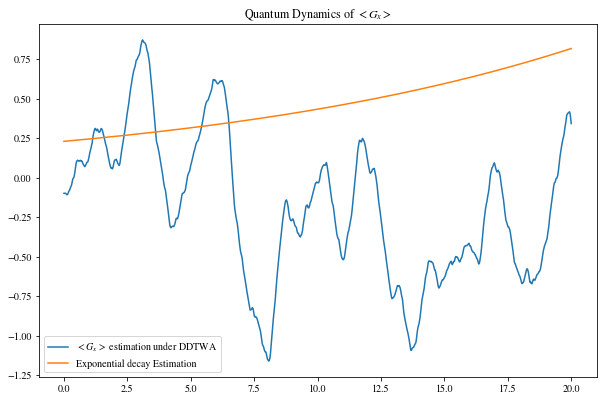

In [49]:
def decaying_sinusoid(t, a, lam, w):
    return a * np.exp(lam * t) * np.cos(w * t)

t_index=1000000

popt, pcov = curve_fit(decaying_sinusoid,
                       times[:t_index],
                       Result_varDDTWA_EM[0][:t_index],
                       p0=(50, -0.1, 0.2))

fig, ax = plt.subplots(1, 1)

timc=times[:t_index]

plt.title("Quantum Dynamics of $<G_x>$")

ax.plot(timc, Result_varDDTWA_EM[0][:t_index],label="$<G_x>$ estimation under DDTWA");
ax.plot(timc, popt[0]*np.exp(popt[1]*np.array(timc)),label="Exponential decay Estimation");

plt.legend()




In [50]:
print(-popt[1]/N,N)


-0.002117787031204225 30


In [ ]:
#S10z_aver=time_averaging(Result_varDDTWA_EM[12],int(n*0.05));
#S21z_aver=time_averaging(Result_varDDTWA_EM[13],int(n*0.05));
#S32z_aver=time_averaging(Result_varDDTWA_EM[14],int(n*0.05));

#S30z=np.array(S10z_aver)+np.array(S21z_aver)+np.array(S32z_aver)

#print(S30z[-1],S21z_aver[-1],OmegaR,OmegaL)

#plt.plot(times,S30z,label="$<S_{30z}>$ estimation under DDTWA")

#plt.legend()

## Bad cavity limit under averaging

In [ ]:
aRx_est=C_R*((KapR/2)* S30y-DeltaR* S30x )
aRy_est=C_R*((KapR/2)* S30x+DeltaR* S30y )
aLx_est=C_L*((KapL/2)* S21y-DeltaL* S21x )
aLy_est=C_L*((KapL/2)* S21x+DeltaL* S21y )


aRx_aver_lim=time_averaging(aRx_est,int(n*0.05));
aRy_aver_lim=time_averaging(aRy_est,int(n*0.05));
aLx_aver_lim=time_averaging(aLx_est,int(n*0.05));
aLy_aver_lim=time_averaging(aLy_est,int(n*0.05));



aRx_aver=time_averaging(Result_varDDTWA_EM[15],int(n*0.05));
aRy_aver=time_averaging(Result_varDDTWA_EM[16],int(n*0.05));
aLx_aver=time_averaging(Result_varDDTWA_EM[17],int(n*0.05));
aLy_aver=time_averaging(Result_varDDTWA_EM[18],int(n*0.05));

In [ ]:
plt.plot(times,aRx_aver_lim,"--",label="$a_{Rx}$ aver")
#plt.plot(times,aRy_aver_lim,"--")
#plt.plot(times,aLx_aver_lim,"--")
#plt.plot(times,aLy_aver_lim,"--")

plt.plot(times,aRx_aver,"--",label="$a_{Rx}$ aver")
#plt.plot(times,aRy_aver,"--")
#plt.plot(times,aLx_aver,"--")
#plt.plot(times,aLy_aver,"--")

plt.legend()

In [ ]:

#plt.plot(times, Result_varDDTWA_EM[12]+Result_varDDTWA_EM[13]+Result_varDDTWA_EM[14],"--",label="$S^z_{30}$ DDTWA EM")

#plt.plot(times,Result_varDDTWA_EM[13],"--",label="$S^z_{21}$ DDTWA EM")

#plt.legend()

In [ ]:
print(OmegaR,OmegaL)

In [ ]:
#S10z_aver=time_averaging(Result_varDDTWA_EM[12],int(n*0.05));
#S21z_aver=time_averaging(Result_varDDTWA_EM[13],int(n*0.05));
#S32z_aver=time_averaging(Result_varDDTWA_EM[14],int(n*0.05));

#S30z=np.array(S10z_aver)+np.array(S21z_aver)+np.array(S32z_aver)

#print(S30z[-1],S21z_aver[-1],OmegaR,OmegaL)

### Description of $\left< G_x \right>$

In [ ]:
plt.plot(times, Result_varDDTWA_EM[0],label="$G_x$ DDTWA EM")

## General averaging of dynamical operators

In [ ]:
S10x_aver=time_averaging(Result_varDDTWA_EM[0],int(n*0.05));
S20x_aver=time_averaging(Result_varDDTWA_EM[1],int(n*0.05));
S30x_aver=time_averaging(Result_varDDTWA_EM[2],int(n*0.05));
S21x_aver=time_averaging(Result_varDDTWA_EM[3],int(n*0.05));
S31x_aver=time_averaging(Result_varDDTWA_EM[4],int(n*0.05));
S32x_aver=time_averaging(Result_varDDTWA_EM[5],int(n*0.05));

S10y_aver=time_averaging(Result_varDDTWA_EM[6],int(n*0.05));
S20y_aver=time_averaging(Result_varDDTWA_EM[7],int(n*0.05));
S30y_aver=time_averaging(Result_varDDTWA_EM[8],int(n*0.05));
S21y_aver=time_averaging(Result_varDDTWA_EM[9],int(n*0.05));
S31y_aver=time_averaging(Result_varDDTWA_EM[10],int(n*0.05));
S32y_aver=time_averaging(Result_varDDTWA_EM[11],int(n*0.05));

S10z_aver=time_averaging(Result_varDDTWA_EM[12],int(n*0.05));
S21z_aver=time_averaging(Result_varDDTWA_EM[13],int(n*0.05));
S32z_aver=time_averaging(Result_varDDTWA_EM[14],int(n*0.05));

S30z=np.array(S10z_aver)+np.array(S21z_aver)+np.array(S32z_aver)

print(S30z[-1],S21z_aver[-1],OmegaR,OmegaL)